### Objective
  Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in visibility in search results.  This feature will help bring more attention to newer apps that have potential.
   The task is to understand what makes an app perform well - size? price? category? multiple factors together? Analyze the data and present your insights in a format consumable by business – the final output of the analysis would be presented to business as insights with supporting data/visualizations.


In [1]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading files
df = pd.read_csv('playstore-analysis.csv') 
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [4]:
for i in df.columns:
    print(i)
    print(df[i].unique())

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
Reviews
['159' '967' '87510' ... '603' '1195' '398307']
Size
[

In [5]:
# a. Drop records where rating is missing since rating is our target/study variable
df['Rating'].isnull().sum()
df1 = df.dropna(subset=['Rating'])
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [6]:
df1 = df1.loc[~df1['App'].str.contains('Life Made')]
#df.columns.str.contains('^X') returns array [True, True, False, False, False].
#True where condition meets. Otherwise False
#Sign ~ refers to negate the condition.
#df.loc[ ] is used to select columns

In [7]:
null_col = "Android Ver", "Current Ver"
for i in null_col: 
    df1[i] = df1[i].fillna(df1[i].mode()[0])

#[0] to choose 1st mode value

In [8]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
'''
2.Data clean up – correcting the data types
    a.Which all variables need to be brought to numeric types?
    b.Price variable – remove $ sign and convert to float
    c.Installs – remove ‘,’ and ‘+’ sign, convert to integer
    d.Convert all other identified columns to numeric
'''

'\n2.Data clean up – correcting the data types\n    a.Which all variables need to be brought to numeric types?\n    b.Price variable – remove $ sign and convert to float\n    c.Installs – remove ‘,’ and ‘+’ sign, convert to integer\n    d.Convert all other identified columns to numeric\n'

In [10]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
#df["Installs"].replace({",":"","+":""})
df1["Installs"] = df1["Installs"].str.replace(",","")
df1["Installs"] = df1["Installs"].str.replace("+","")
df1["Installs"] = df1["Installs"].str.replace("Free","0")
df1["Price"] = df1["Price"].str.replace("$","")
df1["Price"] = df1["Price"].str.replace("Everyone",'0')
df1["Price"] = df1["Price"].str.replace("nan",'0')


In [12]:
#df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
#df["Installs"] = df["Installs"].astype(int)
#df["Price"] = df["Price"].astype(float)

df1[["Installs","Price","Size","Rating","Reviews"]] = df1[["Installs","Price","Size","Rating","Reviews"]].apply(pd.to_numeric)


In [13]:
df1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
df1["Rating"] = df1["Rating"].dropna()
df1["Rating"].unique()
df1.shape

(9366, 13)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
App               9366 non-null object
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null int64
Size              9366 non-null float64
Installs          9366 non-null int64
Type              9366 non-null object
Price             9366 non-null float64
Content Rating    9366 non-null object
Genres            9366 non-null object
Last Updated      9366 non-null object
Current Ver       9366 non-null object
Android Ver       9366 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [17]:
df1.shape

(9366, 13)

In [18]:
df2 = df1[df1['Reviews']<=df1['Installs']]
df2.shape

(9359, 13)

In [19]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
'''
4.Identify and handle outliers – 
    a.Price column
        i.Make suitable plot to identify outliers in price
        ii.Do you expect apps on the play store to cost $200? Check out these cases
        iii.After dropping the useless records, make the suitable plot again to identify outliers
        iv.Limit data to records with price < $30
    b.Reviews column
        i.Make suitable plot
        ii.Limit data to apps with < 1 Million reviews
    c.Installs
        i.What is the 95th percentile of the installs?
        ii.Drop records having a value more than the 95th percentile
'''

'\n4.Identify and handle outliers – \n    a.Price column\n        i.Make suitable plot to identify outliers in price\n        ii.Do you expect apps on the play store to cost $200? Check out these cases\n        iii.After dropping the useless records, make the suitable plot again to identify outliers\n        iv.Limit data to records with price < $30\n    b.Reviews column\n        i.Make suitable plot\n        ii.Limit data to apps with < 1 Million reviews\n    c.Installs\n        i.What is the 95th percentile of the installs?\n        ii.Drop records having a value more than the 95th percentile\n'

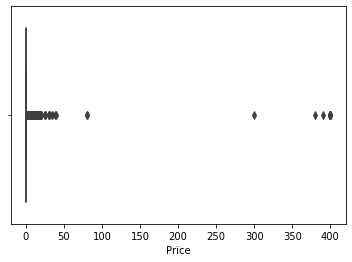

In [21]:
#i.Make suitable plot to identify outliers in price
sns.boxplot(df2["Price"])

In [22]:
q1 = df2["Price"].quantile(.25)
q3 = df2["Price"].quantile(.5)
IQR = q1 - q3 
lower_bound = q1 -(1.5 * IQR) 
upper_bound = q3 +(1.5 * IQR) 
lower_bound

0.0

In [23]:
#ii.Do you expect apps on the play store to cost $200? Check out these cases
df3 = df2[df2["Price"]<200]
df3.shape

(9344, 13)

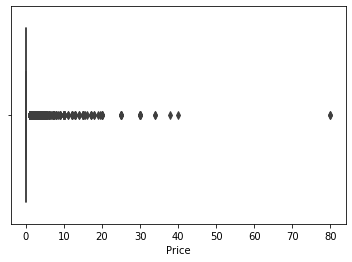

In [24]:
# After dropping the useless records, make the suitable plot again to identify outliers
sns.boxplot(df3["Price"])

In [25]:
#Limit data to records with price < $30
df4 = df3.drop(df3[df3["Price"] > 30].index)
df4.shape

(9338, 13)

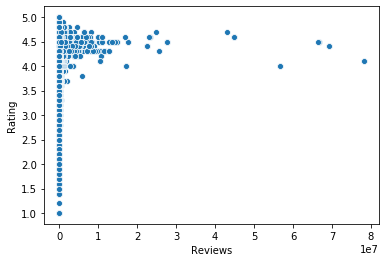

In [26]:
# Reviews column  -  Make suitable plot
# Limit data to apps with < 1 Million reviews
sns.scatterplot(df4["Reviews"],df4["Rating"])

In [27]:
df5 = df4[df4["Reviews"]<1000000]
df5["Reviews"].max()
#df5.shape

995002

In [28]:
'''    c.Installs
        i.What is the 95th percentile of the installs?
        ii.Drop records having a value more than the 95th percentile
'''

q3 = df5["Installs"].quantile(.95)

df6 = df5[df5["Installs"]<q3]
print(q3)
print("Max Value:",df6["Installs"].max())

10000000.0
Max Value: 5000000


# Data analysis to answer business questions

In [29]:
'''
5.What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
    a.How do you explain this?
    b.What is the implication of this on your analysis?
'''

'\n5.What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?\n    a.How do you explain this?\n    b.What is the implication of this on your analysis?\n'

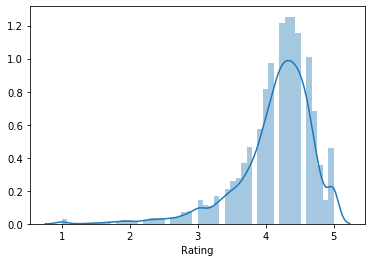

In [30]:
sns.distplot(df6["Rating"])

In [31]:
df6["Content Rating"].value_counts()
# Adult only 18+ & unrated is very few in count

Everyone           5913
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [32]:
#so, drop this two
df6 = df6[(df6["Content Rating"]!="Adults only 18+")&(df6["Content Rating"]!="Unrated")].reset_index()


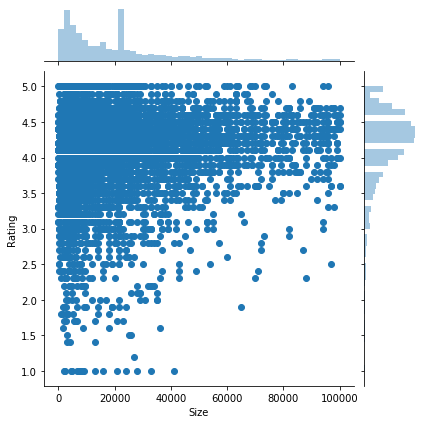

In [33]:
sns.jointplot(df6["Size"],df6["Rating"])

#Smaller the size higher the Rating
#these where inversely proportional

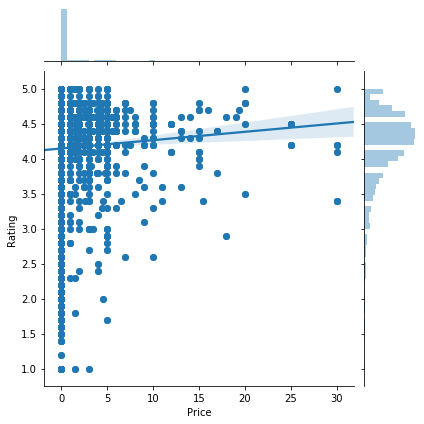

In [34]:
ax = sns.jointplot(df6["Price"],df6["Rating"])
sns.regplot(df6["Price"],df6["Rating"],ax = ax.ax_joint)
#sns.lmplot(df6["Price"],df6["Rating"])

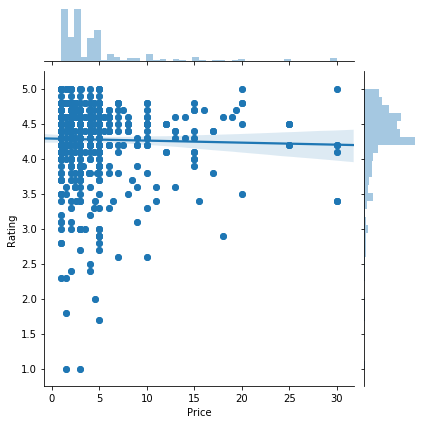

In [35]:
#Replot the data, this time with only records with price > 0 

df7 = df6[df6["Price"]>0]
ax1 = sns.jointplot(df7["Price"],df7["Rating"])
sns.regplot(df7["Price"],df7["Rating"],ax = ax1.ax_joint)
#df7["Price"].min()

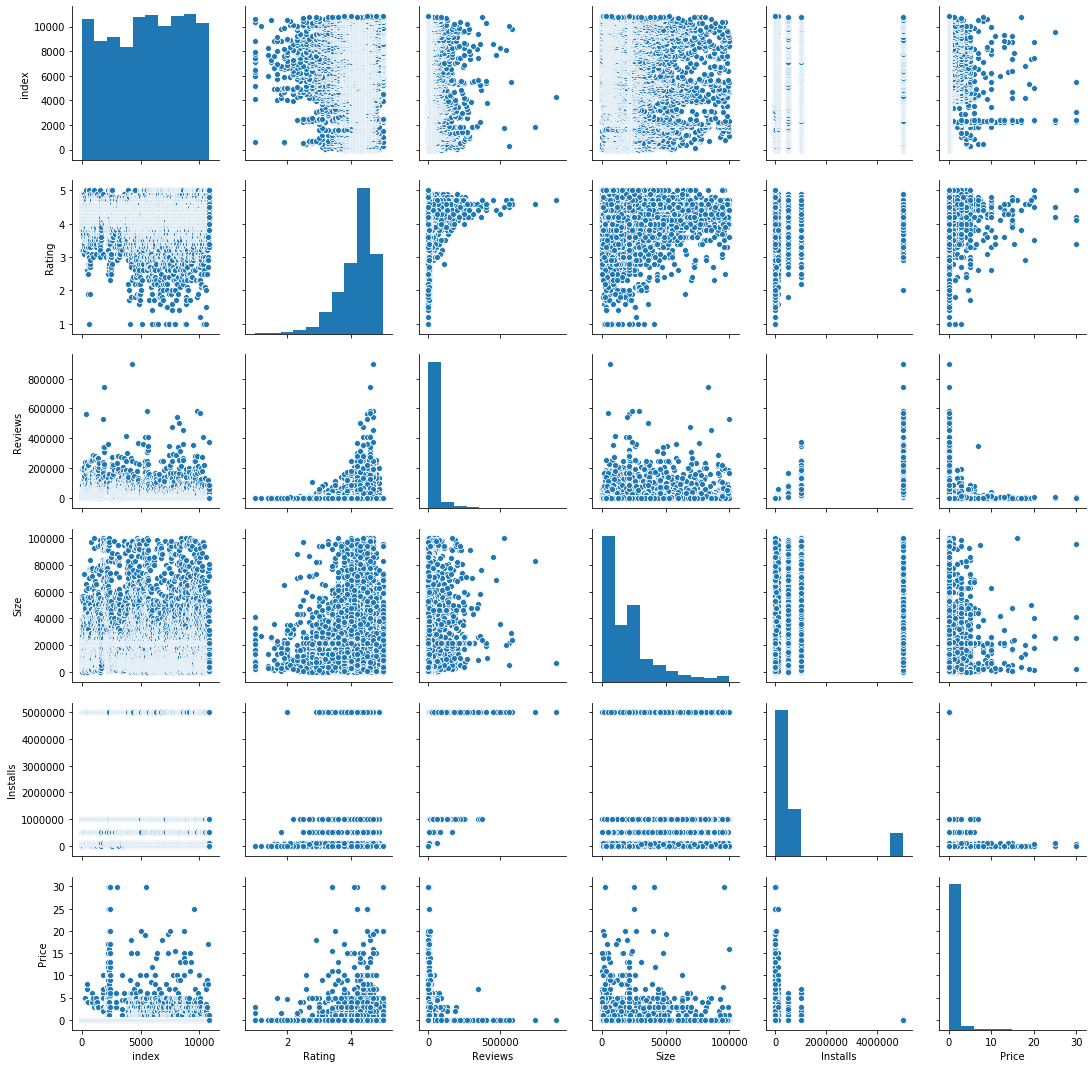

In [36]:
sns.pairplot(df6)

In [37]:
mean_df = df6.groupby("Content Rating").mean().reset_index()
median_df = df6.groupby("Content Rating").median().reset_index()
# no need for quantile

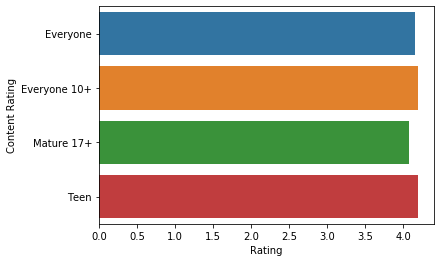

In [38]:
#mean
sns.barplot(mean_df["Rating"],mean_df["Content Rating"])

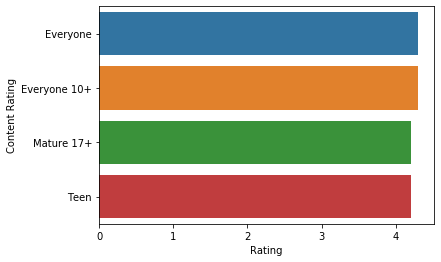

In [39]:
#median
sns.barplot(median_df["Rating"],median_df["Content Rating"])

In [40]:
# i prefer mean

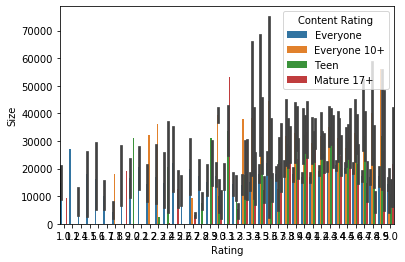

In [41]:
#sns.distplot(df6["Rating"])
#sns.distplot(df6["Content Rating"])

sns.barplot(df6["Rating"],hue = df6["Content Rating"],y = df6["Size"])

In [42]:
df7 = df6.sort_values("Size")
x = df7["index"].count()
y = int(x*.20) + 1

k = []
for i in range(1,6):
    k.append(i)
l = [x * y for x in k]
l

j = []
for i in range(0,5):
    j.append(i)
m = [x * y for x in j]
print(m)
print(l)

[0, 1451, 2902, 4353, 5804]
[1451, 2902, 4353, 5804, 7255]


In [43]:
data = []
for (x,y) in zip(m,l):
    d = df7[x:y]
    data.append(d)

data[2].shape

(1451, 14)

In [44]:
data[0]["Size"].quantile(.20)

q_20 = []

for i in range(5):
    x = data[i]["Size"].quantile(.20)
    q_20.append(x)

In [45]:
data[0].head(2)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1114,1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8.5,50000,Free,0.0,Everyone,Libraries & Demo,"September 27, 2017",1.02,7.1 and up
1128,1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,1000000,Free,0.0,Everyone,Libraries & Demo,"February 12, 2013",Varies with device,1.5 and up


In [ ]:
x = df6[["Rating","Reviews","Size"]]
sns.heatmap(x, annot=True,cmap = "Greens")


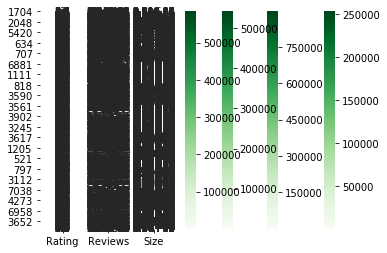

In [46]:
res = []
for i in range(4):
    x = data[i][["Rating","Reviews","Size"]]
    res.append(sns.heatmap(x,annot=True,linewidths=2,cmap = "Greens"))



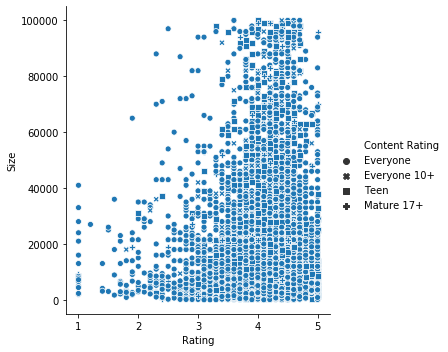

In [56]:
sns.relplot(style="Content Rating", x="Rating", y="Size", sizes=(200, 200), data=df6)